In [126]:
import pandas as pd
import numpy as np 
#Visualização
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

## Carregando e visualizando os Dados

In [127]:
tabela = pd.read_csv('cars_dataset.csv')
tabela

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,Hyundai


## Informações

In [128]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 4.4+ MB


In [129]:
tabela.describe()

,year,price,mileage,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


In [130]:
tabela.describe(include=['O'])

,model,transmission,fuelType,Make
count,72435,72435,72435,72435
unique,146,4,5,7
top,Fiesta,Manual,Petrol,Ford
freq,6556,43021,40370,17964


Renomeando as tabelas

In [131]:
tabela.columns = ['modelo','ano','preco','transmissao','quilometragem','tipo_de_combustivel','imposto','mpg',
                 'tamanho_do_motor','marca']
tabela.drop('mpg',axis=1,inplace = True)
tabela

,modelo,ano,preco,transmissao,quilometragem,tipo_de_combustivel,imposto,tamanho_do_motor,marca
0,A1,2017,12500,Manual,15735,Petrol,150.0,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,1.0,audi
...,...,...,...,...,...,...,...,...,...
72430,I30,2016,8680,Manual,25906,Diesel,0.0,1.6,Hyundai
72431,I40,2015,7830,Manual,59508,Diesel,30.0,1.7,Hyundai
72432,I10,2017,6830,Manual,13810,Petrol,20.0,1.0,Hyundai
72433,Tucson,2018,13994,Manual,23313,Petrol,145.0,1.6,Hyundai


In [132]:
tabela.marca.unique()

array(['audi', 'BMW', 'Ford', 'vw', 'toyota', 'skoda', 'Hyundai'],
      dtype=object)

In [133]:
tabela.marca.replace({'vw':'volkswagen'},inplace=True)

## Análise Exploratória

### Preço médio do veiculo por tipo de transmissão e tipo de combustivel

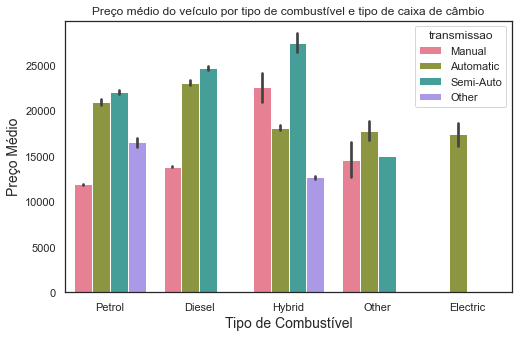

In [134]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="tipo_de_combustivel", y="preco",hue="transmissao", palette="husl",data=tabela)
ax.set_title("Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Combustível",fontdict= {'size':14})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':14})
plt.show()

In [135]:
#Carros mais caros
tabela.sort_values(by='preco', ascending=False).head(3)

,modelo,ano,preco,transmissao,quilometragem,tipo_de_combustivel,imposto,tamanho_do_motor,marca
4783,R8,2020,145000,Semi-Auto,2000,Petrol,145.0,5.2,audi
2255,R8,2020,137995,Semi-Auto,70,Petrol,145.0,5.2,audi
4179,R8,2019,137500,Semi-Auto,10,Petrol,150.0,5.2,audi


In [136]:
#Carros mais baratos
tabela.sort_values(by='preco', ascending=True).head(3)

,modelo,ano,preco,transmissao,quilometragem,tipo_de_combustivel,imposto,tamanho_do_motor,marca
38552,Focus,2003,495,Manual,177644,Petrol,200.0,1.6,Ford
35671,Mondeo,2005,675,Manual,97000,Diesel,205.0,2.0,Ford
38353,Focus,2005,675,Manual,121000,Petrol,235.0,2.0,Ford


## Análise dos dados

In [137]:
#Valores nullos na tabela
tabela.isnull().sum()


modelo                 0
ano                    0
preco                  0
transmissao            0
quilometragem          0
tipo_de_combustivel    0
imposto                0
tamanho_do_motor       0
marca                  0
dtype: int64

### Matriz de correlação

<AxesSubplot:>

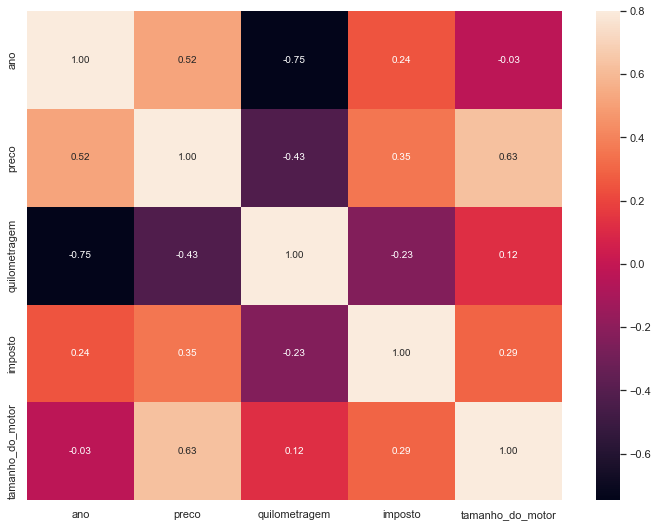

In [138]:
corr = tabela.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True, fmt='.2f')

In [139]:
corr_list = corr['preco'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

tamanho_do_motor    0.629251
ano                 0.519459
imposto             0.353244
quilometragem      -0.426925
Name: preco, dtype: float64